In [1]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras import models, layers
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
import matplotlib.pyplot as plt
from IPython.display import Image
from keras import metrics
from sklearn.metrics import confusion_matrix

In [2]:
root_path = "archive\\natural_images"

In [3]:
image_types = os.listdir(root_path)
print(image_types)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [4]:
X= []
Y = []

for image_type in image_types:
    type_folder = root_path + "\\" + image_type
    folder_data = os.listdir(type_folder)
    for image in folder_data:
        #opening image
        image_path = type_folder + "\\" + image
        image = cv2.imread(image_path)
        image_new = cv2.resize(image, (32,32))
        image_sized = image_new.astype("float32")/255
        X.append(np.array(image_sized))
        Y.append(image_type)

        
        image_flipped_hor = cv2.flip(image_new, 1)
        image_sized = image_flipped_hor.astype("float32")/255
        X.append(np.array(image_sized))
        Y.append(image_type)
        
        image_flipped_vert = cv2.flip(image_new, 1)
        image_sized = image_flipped_vert.astype("float32")/255
        X.append(np.array(image_sized))
        Y.append(image_type)

In [5]:
Y = np.array(Y)
X = np.array(X)



Example Images
airplane :


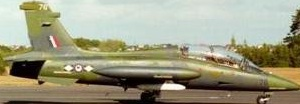

car :


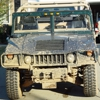

cat :


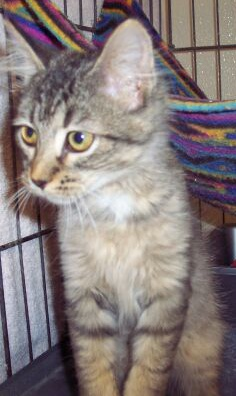

dog :


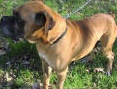

flower :


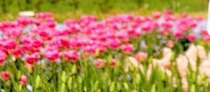

fruit :


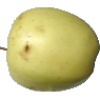

motorbike :


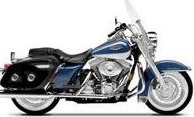

person :


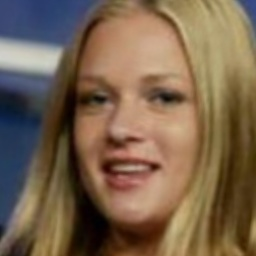

In [6]:
print('Example Images')
for image_type in image_types:
    type_folder = root_path + "\\" + image_type
    folder_data = os.listdir(type_folder)
    for image in folder_data:
        print(image_type , ":")
        image_path = type_folder + "\\" + image
        display(Image(filename=image_path))
        break

In [7]:

enc = OneHotEncoder(sparse = False)
Y = enc.fit_transform(Y.reshape((-1,1)))


In [8]:
r = np.arange(X.shape[0])
np.random.seed(69)
np.random.shuffle(r)
X = X[r]
Y = Y[r]

In [9]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.33)
print(train_Y.shape)
print(train_X.shape)

(13866, 8)
(13866, 32, 32, 3)


In [9]:
model = Sequential([
    BatchNormalization(input_shape=(32,32,3)),
    Conv2D(128, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(2,2), activation='relu'),
    Flatten(),
    Dense(256, activation = "relu"),
    Dense(128, activation = "sigmoid"),
    Dense(8, activation = "softmax")

])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, batch_size=64, epochs=20,  validation_data=(test_X, test_Y))



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Sleepless\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-657afcc8c8c2>", line 1, in <module>
    model = Sequential([
  File "C:\Users\Sleepless\anaconda3\lib\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Sleepless\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 116, in __init__
    super(functional.Functional, self).__init__(  # pylint: disable=bad-super-call
  File "C:\Users\Sleepless\anaconda3\lib\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Sleepless\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 308, in __init__
    self._init_batch_counters()
  Fi

TypeError: object of type 'NoneType' has no len()

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend(loc='lower right')

In [ ]:
model = Sequential([
    BatchNormalization(input_shape=(32,32,3)),
    Conv2D(128, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(2,2), activation='relu'),
    Flatten(),
    Dense(256, activation = "relu"),
    Dense(128, activation = "sigmoid"),
    Dense(8, activation = "softmax")

])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, batch_size=64, epochs=16,  validation_data=(test_X, test_Y))



In [ ]:
print("Max Train Acccraucy: ", max(history.history['accuracy']))
print("Max Test Acccraucy: ", max(history.history['val_accuracy']))

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [ ]:
predicted_Y = model.predict(test_X)
predicted_Y=np.argmax(predicted_Y, axis=1)
try:
    test_Y=np.argmax(test_Y, axis=1)
except:
    test_Y = test_Y
matrix = confusion_matrix(test_Y, predicted_Y)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.4)
for i in range(0,len(image_types)):
    print(i , " ". image_types[i])
    
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictioned Values', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
for i in range(0,20):
    print("Predicted: ", np.argmax(model.predict(np.array(test_X[[i],:,:]))))
    print("Result: ", np.argmax(test_Y[i]))

In [ ]:
alexNetModel = Sequential([
    Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=(2,2))   ,
    Conv2D(256,(5,5),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(384,(3,3),padding='same',activation='relu'),
    Conv2D(384,(3,3),padding='same',activation='relu'),
    Conv2D(256,(3,3),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.4),
    Dense(4096, activation='relu'),
    Dropout(0.4),
    Dense(8,activation='softmax')
])

alexNetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = alexNetModel.fit(train_X, train_Y, epochs=40,  validation_data=(test_X, test_Y))

In [ ]:
print("Max Train Acccraucy: ", max(history.history['accuracy']))
print("Max Test Acccraucy: ", max(history.history['val_accuracy']))

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')